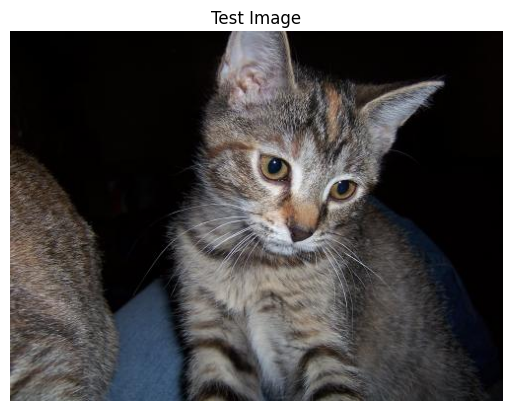

Predicted label: Cat (Confidence: 0.67)


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define paths to image folders
CAT_DIR = r'C:\Users\naren\Downloads\archive\PetImages\Cat'
DOG_DIR = r'C:\Users\naren\Downloads\archive\PetImages\Dog'

# Function to extract HOG features
def extract_features(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        return np.zeros(3780)  
    
    img = cv2.resize(img, (64, 64))
    hog = cv2.HOGDescriptor((64, 64), (16, 16), (8, 8), (8, 8), 9)
    h = hog.compute(img)

    features = h.flatten() if h is not None else np.zeros(3780)
    return features[:3780] if len(features) >= 3780 else np.pad(features, (0, 3780 - len(features)), 'constant')

# Load images and extract features
X = []
y = []

for label, folder in [("Cat", CAT_DIR), ("Dog", DOG_DIR)]:
    for img_file in os.listdir(folder)[:500]:  
        img_path = os.path.join(folder, img_file)
        if os.path.isfile(img_path):
            features = extract_features(img_path)
            X.append(features)
            y.append(label)

# Convert labels to numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert feature list to NumPy array
X = np.array(X, dtype=np.float64)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)  # Enable probability estimation
svm_model.fit(X_train, y_train)

# **Randomly select an image from directories**
chosen_dir = random.choice([CAT_DIR, DOG_DIR])  # Pick a random directory
img_file = random.choice(os.listdir(chosen_dir))  # Pick a random image

image_path = os.path.join(chosen_dir, img_file)

# Load and display the image
img = cv2.imread(image_path)
if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Test Image")
    plt.show()

    # Extract features and classify
    test_features = extract_features(image_path).reshape(1, -1)  
    probabilities = svm_model.predict_proba(test_features)  # Get class probabilities
    confidence = np.max(probabilities)  # Highest confidence score
    prediction = svm_model.predict(test_features)[0]  # Predicted label

    # **Set threshold for "Unknown" classification**
    THRESHOLD = 0.6  # If confidence is below this, classify as "Unknown"
    
    if confidence < THRESHOLD:
        print(f"Predicted label: **Unknown** (Confidence: {confidence:.2f})")
    else:
        print(f"Predicted label: {label_encoder.inverse_transform([prediction])[0]} (Confidence: {confidence:.2f})")